In [1]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

    x axis: sol (1st)
    y axis: water concentration (both)

    x axis: sol
    y axis: substraction of water concentrations / ave of water concentrations

    x axis: sol
    y axis: relative humidity

    x axis: sol
    y axis: air temp

In [6]:
data = pd.read_excel(r'data/wv_data.xlsx')

In [7]:
data

,time,surface bright temperature,Unnamed: 2,air temperature,Unnamed: 4,water concentration derived from relative humidity and air temperature,Unnamed: 6,water concentration derived from atmospheric pressure and water vapor mixing ratio,Unnamed: 8,relative humidity,Unnamed: 10,air pressure,Unnamed: 12,horizontal wind speed,Unnamed: 14
0,1.541667,232.130976,2.912383,266.900030,4.193424,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,704.004543,0.433318,NaN,NaN
1,9.500000,277.312929,1.435172,251.787912,0.587925,1.748621e-06,2.129926e-07,1.746734e-06,2.092683e-07,0.169663,0.028258,714.098485,0.291986,NaN,NaN
2,9.541667,276.328027,1.346681,257.280870,2.245031,9.116341e-08,1.726270e-07,9.138015e-08,1.707914e-07,0.006890,0.013189,708.384348,0.269517,NaN,NaN
3,9.583333,268.414254,3.523061,253.037360,1.054166,3.259404e-07,2.739322e-07,3.258327e-07,2.718778e-07,0.024674,0.021228,696.916371,2.708844,NaN,NaN
4,9.625000,263.484449,2.025895,252.040357,0.371776,4.509850e-07,1.971401e-07,4.501927e-07,1.930137e-07,0.033694,0.015075,693.529007,0.564038,NaN,NaN
5,9.666667,252.427508,2.246539,246.582997,0.466624,2.923600e-06,9.862596e-08,2.921980e-06,9.790862e-08,0.402929,0.014743,690.953367,0.143015,NaN,NaN
6,9.708333,235.767983,2.961548,232.204370,0.103084,3.135539e-06,3.241200e-08,3.134900e-06,3.190092e-08,1.449916,0.016828,693.442353,0.079301,NaN,NaN
7,9.750000,223.332521,3.605738,230.642941,1.861674,2.154486e-06,1.720283e-08,2.153204e-06,1.727873e-08,2.706050,0.027446,707.043866,0.232770,NaN,NaN
8,9.791667,214.387353,4.379853,222.825504,0.865559,1.558020e-06,9.493363e-09,1.556675e-06,9.388572e-09,3.996134,0.078243,733.984538,0.372141,NaN,NaN
9,9.833333,209.881429,5.008461,216.946345,0.214968,1.165286e-06,8.757586e-09,1.164179e-06,8.831149e-09,4.977143,0.054920,740.479160,0.192035,NaN,NaN


In [9]:
x_time = [row[0] for (index, row) in data.iterrows()]

In [20]:
water_conc_relative_hum_air_temp = [row[5] for (index, row) in data.iterrows()]

air_temp = [row[3] for (index, row) in data.iterrows()]

relative_hum = [row[9] for (index, row) in data.iterrows()]

water_conc_atm_pres_vapor_mix_ratio = [row[7] for (index, row) in data.iterrows()]

In [116]:
air_pressure = [row[11] for (index, row) in data.iterrows()]

In [129]:
horizontal_wind_speed = [row[13] for (index, row) in data.iterrows()]

In [164]:
division_2 = [2 for e in range(len(water_conc_relative_hum_air_temp))]
ave_bet_conc = np.divide(np.add(water_conc_relative_hum_air_temp, water_conc_atm_pres_vapor_mix_ratio), division_2)
subtract_conc = np.subtract(water_conc_atm_pres_vapor_mix_ratio, water_conc_relative_hum_air_temp)
final_sub_conc = np.divide(subtract_conc, ave_bet_conc)

In [174]:
pos_conc = [abs(e) for e in final_sub_conc]

In [180]:
# draw a prob dist among the difference bet 2 concentration
divs = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for p in pos_conc:
    if 0 < p < 0.01:
        divs[0] += 1
    if 0.01 < p < 0.02:
        divs[1] += 1
    if 0.02 < p < 0.03:
        divs[2] += 1
    if 0.03 < p < 0.04:
        divs[3] += 1
    if 0.04 < p < 0.05:
        divs[4] += 1
    if 0.05 < p < 0.06:
        divs[5] += 1
    if 0.06 < p < 0.07:
        divs[6] += 1
    if 0.07 < p < 0.08:
        divs[7] += 1
    if 0.08 < p < 0.09:
        divs[8] += 1
    if 0.09 < p < 0.10:
        divs[9] += 1
divs

[54315, 226, 165, 109, 105, 57, 42, 23, 7, 9, 0]

In [190]:
res = 54315 / len(x_time)
res

0.9864513902762391

Text(0.5, 0, 'P dist')

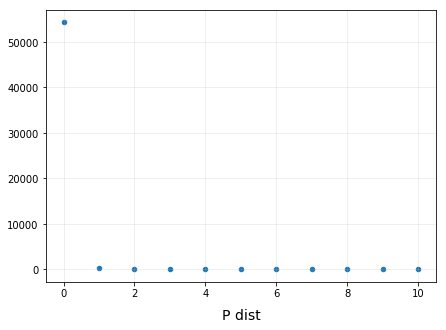

In [188]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(range(len(divs)), divs, s = 20)
#axs.set_xticks(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

#axs.set_ylim(0, 0.1)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('P dist', labelpad = 10, fontsize = 14)
#plt.ylabel('Normalized difference', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Relative difference')

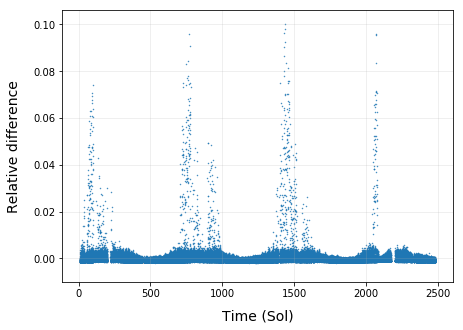

In [191]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, final_sub_conc, s = 0.2)
#axs.set_xlim(300, 305)
axs.set_ylim(-0.01, 0.106)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Relative difference', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Relative Humidity')

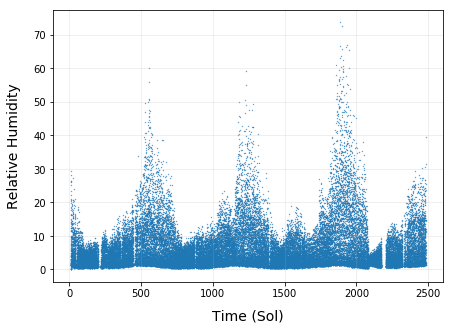

In [128]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, relative_hum, s = 0.1)
#axs.set_xlim(300, 305)
#axs.set_ylim(0, 12)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Relative Humidity', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Relative Humidity')

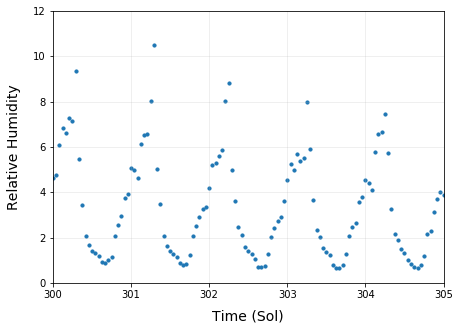

In [155]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, relative_hum, s = 10)
axs.set_xlim(300, 305)
axs.set_ylim(0, 12)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Relative Humidity', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Air Temperature')

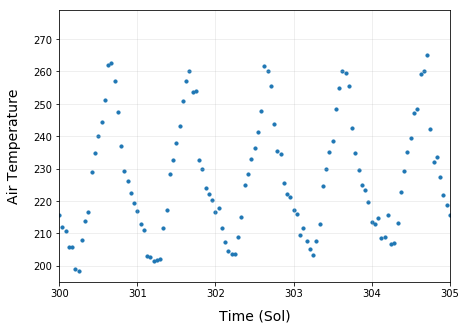

In [147]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, air_temp, s = 10)
axs.set_xlim(300, 305)
axs.set_ylim(195, 279)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Air Temperature', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Air Temperature')

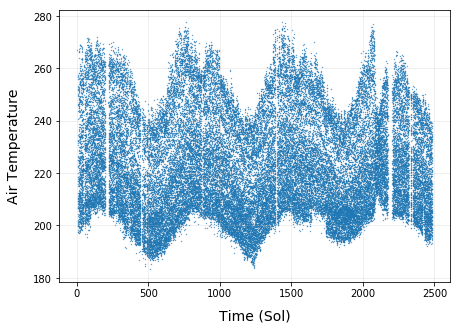

In [125]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, air_temp, s = 0.1)
#axs.set_xlim(300, 305)
#axs.set_ylim(0.0000000000000000000001, 0.000066)

axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Air Temperature', labelpad = 12, fontsize = 14)

Text(0.5, 1.0, 'Water concentration derived from relative humidity and air temperature')

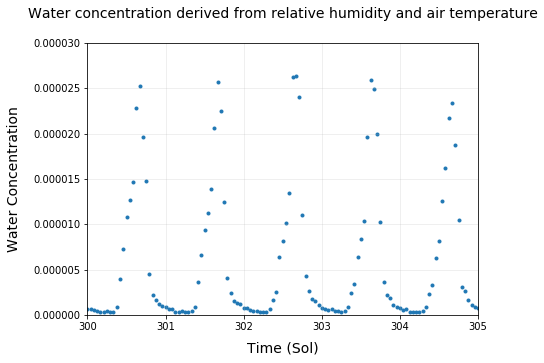

In [108]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, water_conc_relative_hum_air_temp, s = 9)
axs.set_xlim(300, 305)

axs.set_ylim(0, 0.00003)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
 #                       '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Water Concentration', labelpad = 12, fontsize = 14)
plt.title('Water concentration derived from relative humidity and air temperature', pad = 25, fontsize = 14)

Text(0.5, 1.0, 'Water concentration derived from relative humidity and air temperature')

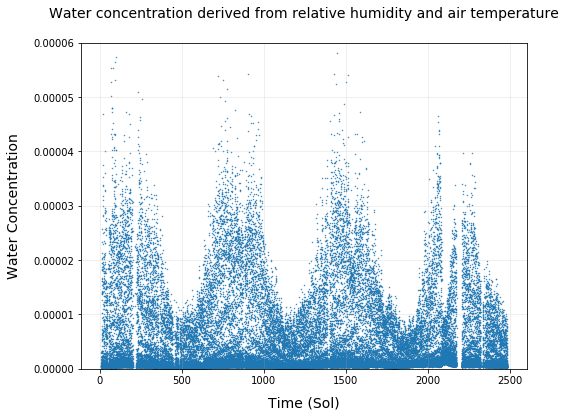

In [110]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, water_conc_relative_hum_air_temp, s = 0.2)
#axs.set_xlim(300, 305)

axs.set_ylim(0, 0.00006)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Water Concentration', labelpad = 12, fontsize = 14)
plt.title('Water concentration derived from relative humidity and air temperature', pad = 25, fontsize = 14)

Text(0.5, 1.0, 'Water concentration derived from atmospheric pressure and water vapor mixing ratio')

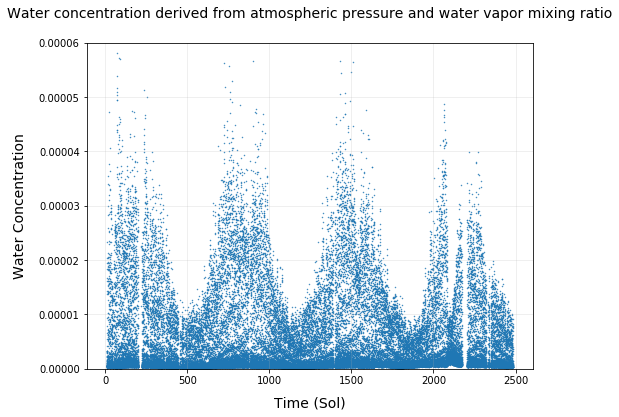

In [109]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, water_conc_atm_pres_vapor_mix_ratio, s = 0.2)
#axs.set_xlim(300, 305)

axs.set_ylim(0, 0.00006)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Water Concentration', labelpad = 12, fontsize = 14)
plt.title('Water concentration derived from atmospheric pressure and water vapor mixing ratio', pad = 25, fontsize = 14)

Text(0.5, 1.0, 'Water concentration derived from atmospheric pressure and water vapor mixing ratio')

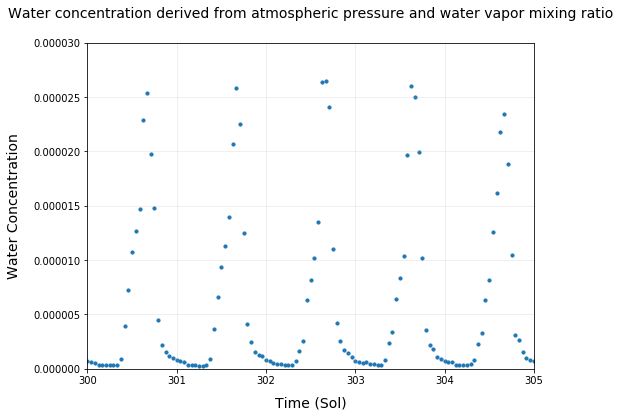

In [112]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, water_conc_atm_pres_vapor_mix_ratio, s = 10)
axs.set_xlim(300, 305)

axs.set_ylim(0, 0.00003)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Water Concentration', labelpad = 12, fontsize = 14)
plt.title('Water concentration derived from atmospheric pressure and water vapor mixing ratio', pad = 25, fontsize = 14)

Text(0, 0.5, 'Air pressure (Pa)')

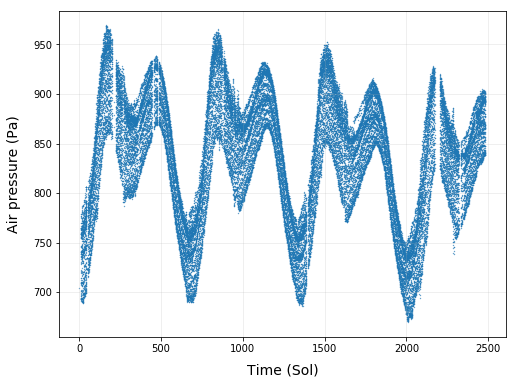

In [149]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, air_pressure, s = 0.1)
#axs.set_xlim(300, 305)

#axs.set_ylim(0, 0.00003)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Air pressure (Pa)', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Air pressure (Pa)')

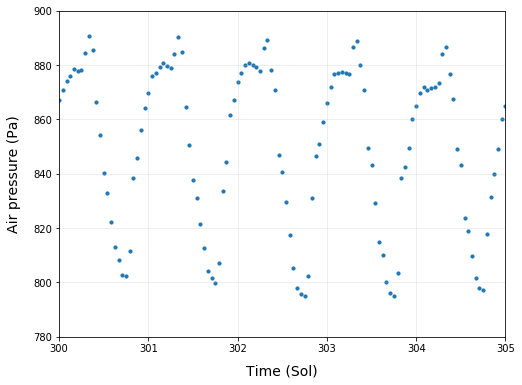

In [154]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, air_pressure, s = 10)
axs.set_xlim(300, 305)

axs.set_ylim(780, 900)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Air pressure (Pa)', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Horizontal wind speed')

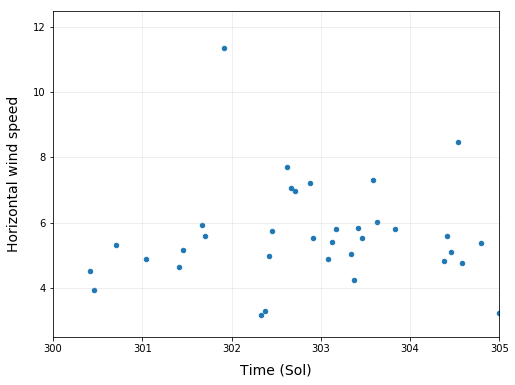

In [140]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, horizontal_wind_speed, s = 20)
axs.set_xlim(300, 305)

axs.set_ylim(2.5, 12.5)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Horizontal wind speed', labelpad = 12, fontsize = 14)

Text(0, 0.5, 'Horizontal wind speed')

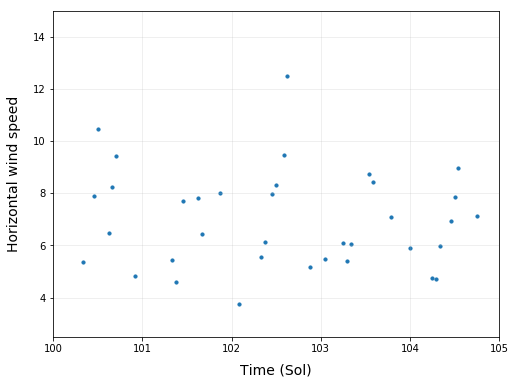

In [145]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.scatter(x_time, horizontal_wind_speed, s = 10)
axs.set_xlim(100, 105)

axs.set_ylim(2.5, 15)
#axs.set_yticks([0, 0.000005, 0.00001, 0.000015, 0.00002, 0.000025, 0.00003, 0.000035, 0.0000])
#axs.set_yticklabels(['0', '5.0 x $10^{-5}$', '1.0 x $10^{-4}$', '1.5 x $10^{-4}$', '2.0 x $10^{-4}$', '2.5 x $10^{-4}$', 
#                        '3.0 x $10^{-4}$'], fontsize = 11)
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

plt.xlabel('Time (Sol)', labelpad = 10, fontsize = 14)
plt.ylabel('Horizontal wind speed', labelpad = 12, fontsize = 14)

    Sooo... right now I need to fill in the gap (｡ ́︿ ̀｡)
    YAY
    haha let's start looking at the time(sol) that was missing (step 1)

In [8]:
data

,time,surface bright temperature,Unnamed: 2,air temperature,Unnamed: 4,water concentration derived from relative humidity and air temperature,Unnamed: 6,water concentration derived from atmospheric pressure and water vapor mixing ratio,Unnamed: 8,relative humidity,Unnamed: 10,air pressure,Unnamed: 12,horizontal wind speed,Unnamed: 14
0,1.541667,232.130976,2.912383,266.900030,4.193424,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,704.004543,0.433318,NaN,NaN
1,9.500000,277.312929,1.435172,251.787912,0.587925,1.748621e-06,2.129926e-07,1.746734e-06,2.092683e-07,0.169663,0.028258,714.098485,0.291986,NaN,NaN
2,9.541667,276.328027,1.346681,257.280870,2.245031,9.116341e-08,1.726270e-07,9.138015e-08,1.707914e-07,0.006890,0.013189,708.384348,0.269517,NaN,NaN
3,9.583333,268.414254,3.523061,253.037360,1.054166,3.259404e-07,2.739322e-07,3.258327e-07,2.718778e-07,0.024674,0.021228,696.916371,2.708844,NaN,NaN
4,9.625000,263.484449,2.025895,252.040357,0.371776,4.509850e-07,1.971401e-07,4.501927e-07,1.930137e-07,0.033694,0.015075,693.529007,0.564038,NaN,NaN
5,9.666667,252.427508,2.246539,246.582997,0.466624,2.923600e-06,9.862596e-08,2.921980e-06,9.790862e-08,0.402929,0.014743,690.953367,0.143015,NaN,NaN
6,9.708333,235.767983,2.961548,232.204370,0.103084,3.135539e-06,3.241200e-08,3.134900e-06,3.190092e-08,1.449916,0.016828,693.442353,0.079301,NaN,NaN
7,9.750000,223.332521,3.605738,230.642941,1.861674,2.154486e-06,1.720283e-08,2.153204e-06,1.727873e-08,2.706050,0.027446,707.043866,0.232770,NaN,NaN
8,9.791667,214.387353,4.379853,222.825504,0.865559,1.558020e-06,9.493363e-09,1.556675e-06,9.388572e-09,3.996134,0.078243,733.984538,0.372141,NaN,NaN
9,9.833333,209.881429,5.008461,216.946345,0.214968,1.165286e-06,8.757586e-09,1.164179e-06,8.831149e-09,4.977143,0.054920,740.479160,0.192035,NaN,NaN


In [63]:
int_time = [int(e) for e in x_time]

In [64]:
x_y_wv_conc1_zip = zip(int_time, water_conc_relative_hum_air_temp)

In [136]:
max_day = int(x_time[-1])
day_total = [e + 1 for e in range(max_day)]

In [137]:
# this is the ranged conc from 1 - 2
ranged_y = [[e[1] for e in zip(int_time, water_conc_relative_hum_air_temp) if e[0] == day] for day in day_total]

In [138]:
daily_ave_conc = [np.mean(e) for e in ranged_y]

In [209]:
import math
missing_index = [i for i in range(len(daily_ave_conc)) if math.isnan(daily_ave_conc[i]) is True]

In [214]:
missing_day = [e + 1 for e in missing_index]

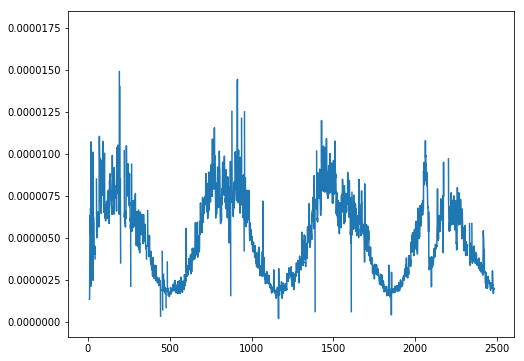

In [139]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
fig.subplots_adjust(hspace=0)

axs.plot(day_total, daily_ave_conc)
#axs.set_xlim(1, 669)

In [145]:
monthly_total = [e for e in day_total if e%30 == 0]
monthly_total.insert(0, 0)

In [203]:
monthly_ranged_y = [[e[1] for e in zip(day_total, daily_ave_conc) if month < e[0] <= month + 30 and e[1] >= 0
                    ] for month in monthly_total]

In [204]:
monthly_ave_conc = [np.mean(e) for e in monthly_ranged_y]

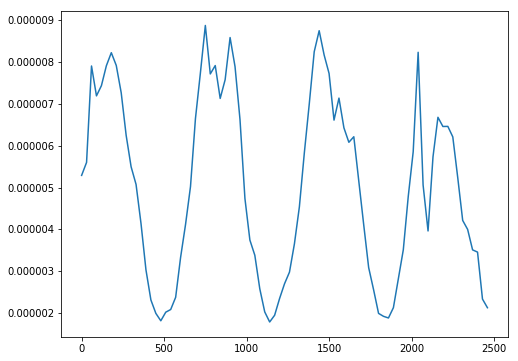

In [205]:
fig, axs = plt.subplots(1, 1, figsize= (8,6))
fig.subplots_adjust(hspace=0)

axs.plot(monthly_total, monthly_ave_conc)
#axs.set_xlim(1, 669)